In [1]:
from tensorflow.keras.layers import Input,Dense,Lambda,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=[224,224]
train_path='../Deeplearning/Datasets/Datasets/Datasets/Train'
test_path='../Deeplearning/Datasets/Datasets/Datasets/Test'

In [3]:
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
for layer in resnet.layers:
    layer.trainable=False

In [6]:
folder=glob('../Deeplearning/Datasets/Datasets/Datasets/Train/*')

In [7]:
folder

['../Deeplearning/Datasets/Datasets/Datasets/Train\\audi',
 '../Deeplearning/Datasets/Datasets/Datasets/Train\\lamborghini',
 '../Deeplearning/Datasets/Datasets/Datasets/Train\\mercedes']

In [8]:
x=Flatten()(resnet.output)

In [9]:
predict=Dense(len(folder),activation='softmax')(x)
model=Model(inputs=resnet.input,outputs=predict)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 )
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
train_set=train_datagen.flow_from_directory('../Deeplearning/Datasets/Datasets/Datasets/Train/',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set=test_datagen.flow_from_directory('../Deeplearning/Datasets/Datasets/Datasets/Test/',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 58 images belonging to 3 classes.


In [18]:
r=model.fit_generator(train_set,
                      validation_data=test_set,
                      epochs=50,
                      steps_per_epoch=len(train_set),
                      validation_steps=len(test_set))

C:\Users\svygralingam\AppData\Local\Temp\4\ipykernel_10272\1603026277.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(train_set,


Epoch 1/50
2/2 [==============================] - 22s 11s/step - loss: 5.3580 - accuracy: 0.2500 - val_loss: 21.4060 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 12s 8s/step - loss: 13.6840 - accuracy: 0.3125 - val_loss: 8.0487 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 11s 7s/step - loss: 4.5190 - accuracy: 0.4531 - val_loss: 2.8690 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 10s 7s/step - loss: 6.1785 - accuracy: 0.4688 - val_loss: 5.4616 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 10s 7s/step - loss: 7.5683 - accuracy: 0.4219 - val_loss: 4.8354 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 10s 7s/step - loss: 6.0293 - accuracy: 0.3906 - val_loss: 2.8055 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 11s 8s/step - loss: 2.3450 - accuracy: 0.4375 - val_loss: 4.0865 - val_accuracy: 0.1552
Epoch 8/50
2/2 [===============

In [20]:
r.history

{'loss': [5.357989311218262,
  13.68397045135498,
  4.5189971923828125,
  6.1784987449646,
  7.568346977233887,
  6.0293121337890625,
  2.3449740409851074,
  3.450176477432251,
  3.1684634685516357,
  1.553780198097229,
  1.9996798038482666,
  2.1091432571411133,
  1.5756419897079468,
  1.7103207111358643,
  1.2719740867614746,
  1.1529362201690674,
  1.0046321153640747,
  0.7111319303512573,
  0.9025852680206299,
  0.6570857167243958,
  0.6329307556152344,
  0.4879307150840759,
  0.6259511709213257,
  0.4686024785041809,
  0.47903957962989807,
  0.3542216420173645,
  0.3968290686607361,
  0.4112275242805481,
  0.3208436369895935,
  0.4074936509132385,
  0.3917688727378845,
  0.3692924976348877,
  0.29126667976379395,
  0.30226123332977295,
  0.2886013388633728,
  0.24602550268173218,
  0.2810640037059784,
  0.24588513374328613,
  0.32890868186950684,
  0.2499738484621048,
  0.234282448887825,
  0.2833455502986908,
  0.2309211641550064,
  0.22710338234901428,
  0.21821099519729614,
  0

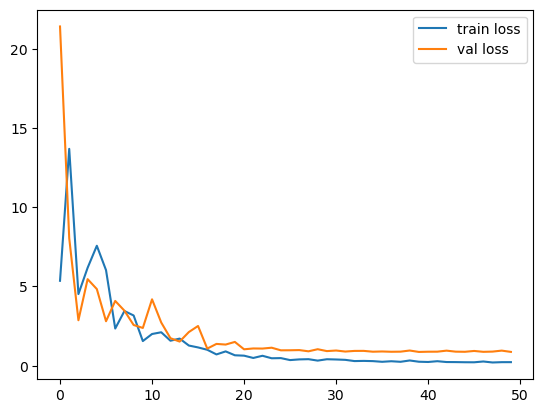

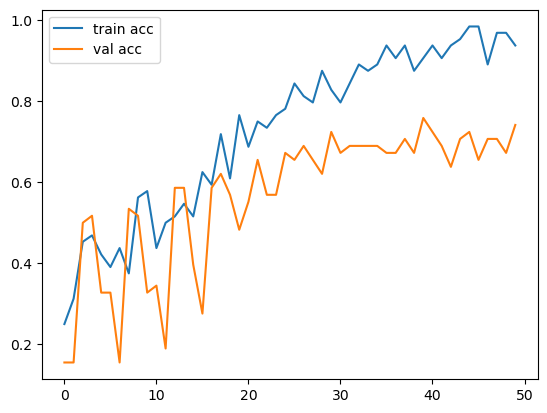

In [21]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

In [22]:
model.save('model_resnet50.h5')

In [23]:
y_pred=model.predict(test_set)

2/2 [==============================] - 8s 2s/step


In [28]:
y_pred

array([1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2], dtype=int64)

In [29]:
y_pred=np.argmax(y_pred,axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [30]:
y_pred

array([1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2], dtype=int64)